In [87]:
import sys 
import stacklineplot
import torch
import torch.utils.data as data
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 8]
sys.path.append("../")
from utils import reduce_channel_batch, interpolate_signals

### VQVAE 2 Fill

In [139]:
samples = np.load("../denoise/results_fill/sample-eval-1000.npy")
sample_idx = 1
sample = samples[sample_idx]

original = sample[:3]
target = sample[1:2]
reconstructed = sample[3:]

# y1 = sample[0, :]
# y2 = sample[2, :]
# estimated = (y1 + y2) / 2
estimated = np.expand_dims(interpolate_signals(sample[0], sample[2]), 0)
# criterion = torch.nn.MSELoss()
criterion = torch.nn.L1Loss()

#### Original

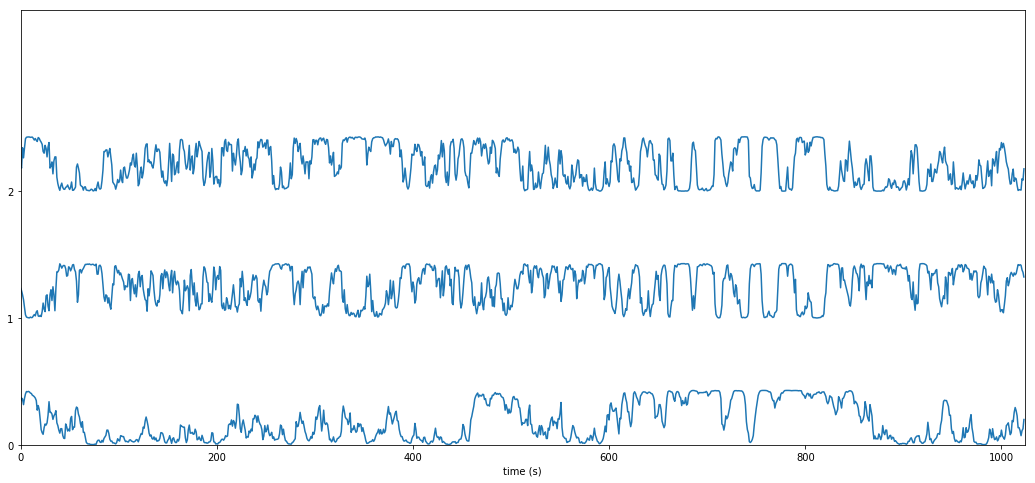

In [140]:
plt.rcParams['figure.figsize'] = [18, 8]
stacklineplot.stackplot(original, yscale=.3)

#### Target vs Reconstructed

estimated diff tensor(0.5154)
reconstructed diff tensor(0.4283)


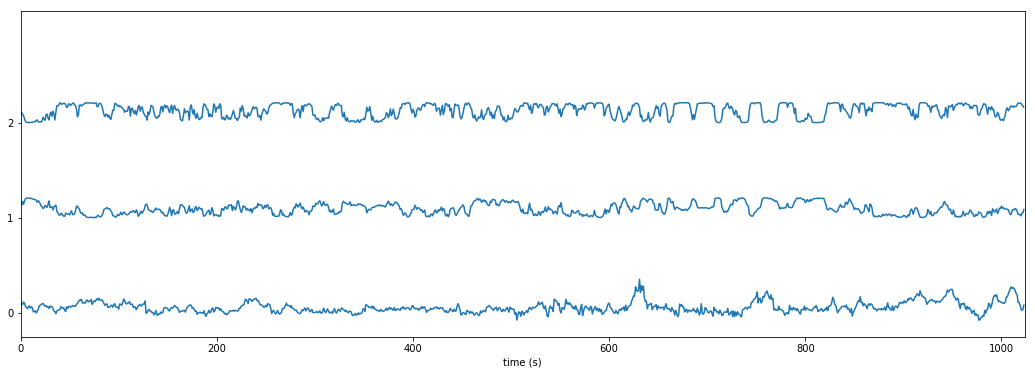

In [141]:
plt.rcParams['figure.figsize'] = [18, 6]
stacklineplot.stackplot(np.vstack((reconstructed, estimated, target)), yscale=.3)
print("estimated diff", criterion(torch.from_numpy(estimated), torch.from_numpy(target)))
print("reconstructed diff", criterion(torch.from_numpy(reconstructed), torch.from_numpy(target)))
# first one is the target
# second is the estimated via interpolation
# third is estiamted via vq-vae 2

### Conv VAE Neural Fill

Conv VAE with 3 channel input and 1 channel output

In [105]:
samples = np.load("../denoise/results_denoise/1c_conv_fill_eval_999.npy")
sample_idx = 2
sample = samples[sample_idx]

original = sample[:3, :]
reconstructed = np.expand_dims(sample[3], 0)
estimated = np.expand_dims(interpolate_signals(sample[0], sample[2]), 0)
target_channel = np.expand_dims(original[1], 0)
all_versions = np.squeeze(np.stack([estimated, reconstructed, target_channel]))

#### All on Same Plot

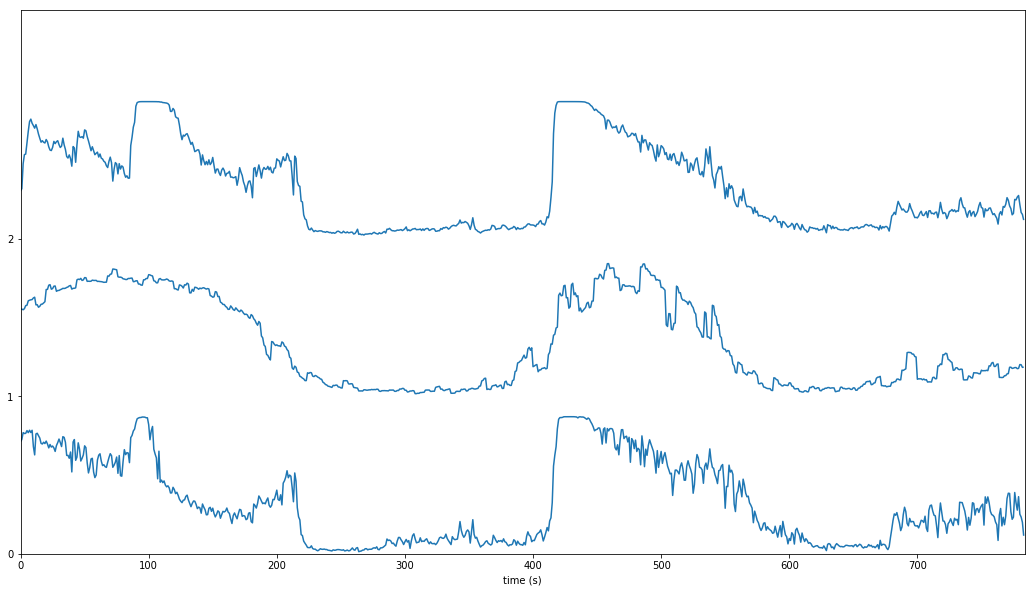

In [106]:
plt.rcParams['figure.figsize'] = [18, 10]
stacklineplot.stackplot(all_versions, yscale=.6)
# 1st is original, 2nd is VAE, 3rd is Inerpolation

#### Original

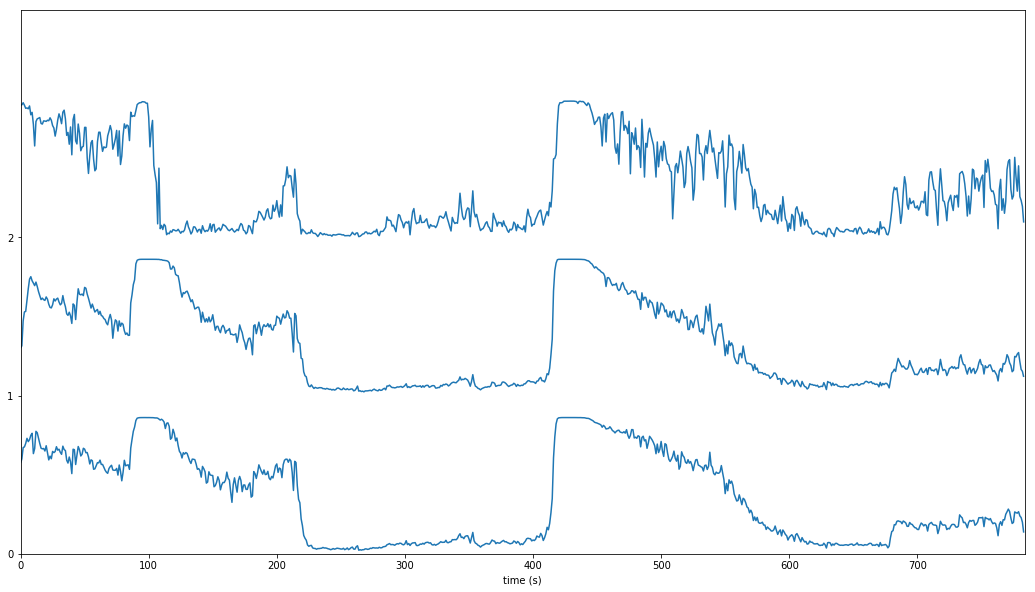

In [107]:
plt.rcParams['figure.figsize'] = [18, 10]
stacklineplot.stackplot(original, yscale=.6)
# middle channel is target channel

#### Fill by VAE

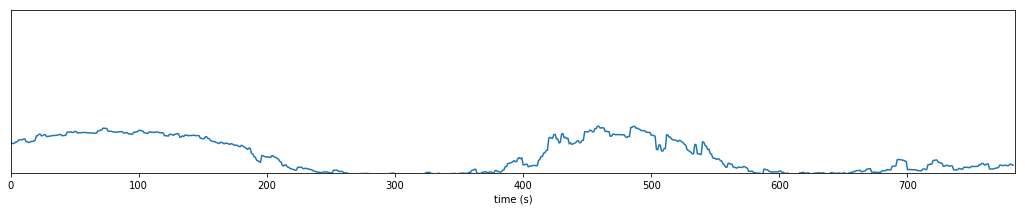

In [108]:
plt.rcParams['figure.figsize'] = [18, 3]
stacklineplot.stackplot(reconstructed, yscale=.3)

#### Fill by Interpolation

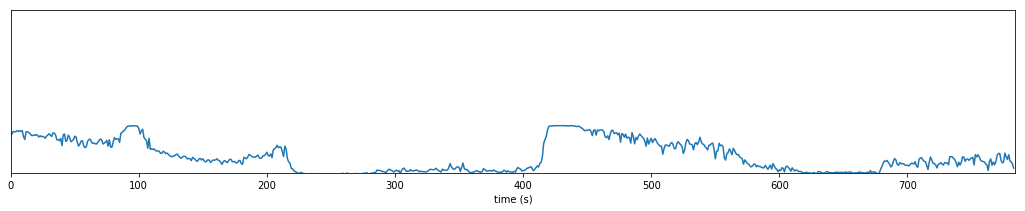

In [109]:
plt.rcParams['figure.figsize'] = [18, 3]
stacklineplot.stackplot(estimated, yscale=.3)